In [1]:
!pip install pandas numpy seaborn geopandas matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# Reading in clean data frames 
clean_year1_df = pd.read_csv(r"C:\Users\Jen_L\year1_df.csv")
clean_year2_df = pd.read_csv(r"C:\Users\Jen_L\year2_df.csv")
clean_rank1_df = pd.read_csv(r"C:\Users\Jen_L\rank1_df.csv")
clean_rank2_df = pd.read_csv(r"C:\Users\Jen_L\rank2_df.csv")
clean_year5_df = pd.read_csv(r"C:\Users\Jen_L\year5_df.csv")
clean_year6_df = pd.read_csv(r"C:\Users\Jen_L\year6_df.csv")
clean_year7_df = pd.read_csv(r"C:\Users\Jen_L\year7_df.csv")
clean_year8_df = pd.read_csv(r"C:\Users\Jen_L\year8_df.csv")
clean_year9_df = pd.read_csv(r"C:\Users\Jen_L\year9_df.csv")

state_df = pd.read_csv(
    r"C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\state_combined_data\state_combined.csv",
    dtype={
        'State': str,
        'County': str,
        'Industry': str,
        'Suspicious Activity': str,
        'Regulator': str,
        'Product': str,
        'Instrument': str,
        'Countym': str,
        'Year': int,
        'Count': float
    },
    thousands=','
)

In [4]:
clean_year1_df.head()

,Month,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,January,65898.0,66101.0,70460.0,75234.0,75619.0,88130,100171.0,97471.0,131949.0,158497.0,165663.0
1,February,61637.0,65984.0,73927.0,73806.0,71908.0,86497,90721.0,98318.0,134587.0,157286.0,165823.0
2,March,64462.0,73420.0,83964.0,88071.0,87326.0,97933,101588.0,116790.0,165396.0,191348.0,165540.0
3,April,73302.0,74049.0,81282.0,77383.0,78763.0,91088,102478.0,114397.0,157832.0,161100.0,168409.0
4,May,75301.0,68216.0,80822.0,77500.0,84790.0,95166,88941.0,109821.0,149970.0,171810.0,174560.0


In [5]:
clean_rank1_df.head()

,Rank,State/Territory,Filings (Overall),Percentage (Overall),Rank.1,State/Territory.1,Filings (Overall).1,Percentage (Overall).1
0,1,California,2291535,0.12930068441703124,31,Oklahoma,132202,Less than 1%
1,2,Ohio,1445487,0.08156212251435009,32,Mississippi,130258,Less than 1%
2,3,New York,1423928,0.08034564820549303,33,Oregon,124186,Less than 1%
3,4,North Carolina,1252861,0.07069313136365196,34,Puerto Rico,113601,Less than 1%
4,5,Texas,1196373,0.06750577569971959,35,Kentucky,94442,Less than 1%


In [6]:
clean_rank2_df.head()

,Rank,Suspicious Activity Type,Filings (Overall),Percentage (Overall)
0,1,Suspicion concerning the source of funds,3538283,0.08807251955424432
1,2,Transaction(s) below CTR threshold,3515701,0.0875104238607755
2,3,Check,2919906,0.07268030236178263
3,4,"Transaction with no apparent economic, busines...",2917251,0.07261421591832502
4,5,Transaction out of pattern for customer(s),2498336,0.06218687035860968


In [7]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440584 entries, 0 to 440583
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 440584 non-null  int64  
 1   State                440584 non-null  object 
 2   County               66833 non-null   object 
 3   Industry             440584 non-null  object 
 4   Suspicious Activity  440584 non-null  object 
 5   Regulator            440584 non-null  object 
 6   Product              440584 non-null  object 
 7   Instrument           440584 non-null  object 
 8   Count                440584 non-null  float64
 9   Countym              373751 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 33.6+ MB


In [8]:
state_df.head()

,Year,State,County,Industry,Suspicious Activity,Regulator,Product,Instrument,Count,Countym
0,2020,Alabama,"Autauga County, AL",Depository Institution,ACH,FDIC,Deposit Account,Bank/Cashier's Check,1.0,NaN
1,2020,Alabama,"Autauga County, AL",Depository Institution,ACH,FDIC,Deposit Account,Personal/Business Check,1.0,NaN
2,2020,Alabama,"Autauga County, AL",Depository Institution,ACH,FDIC,Deposit Account,U.S. Currency,1.0,NaN
3,2020,Alabama,"Autauga County, AL",Depository Institution,ACH,FDIC,Deposit Account,[Total],3.0,NaN
4,2020,Alabama,"Autauga County, AL",Depository Institution,ACH,FDIC,[Total],[Total],3.0,NaN


In [9]:
state_df['Countym']

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
                ...        
440579    Weston County, WY
440580    Weston County, WY
440581    Weston County, WY
440582              [Total]
440583              [Total]
Name: Countym, Length: 440584, dtype: object

## 1. How has the total number of SARs changed over time (by month, quarter, or year) for each institution type? Depository institutions include banks, thrifts, savings and loans, and credit unions. 

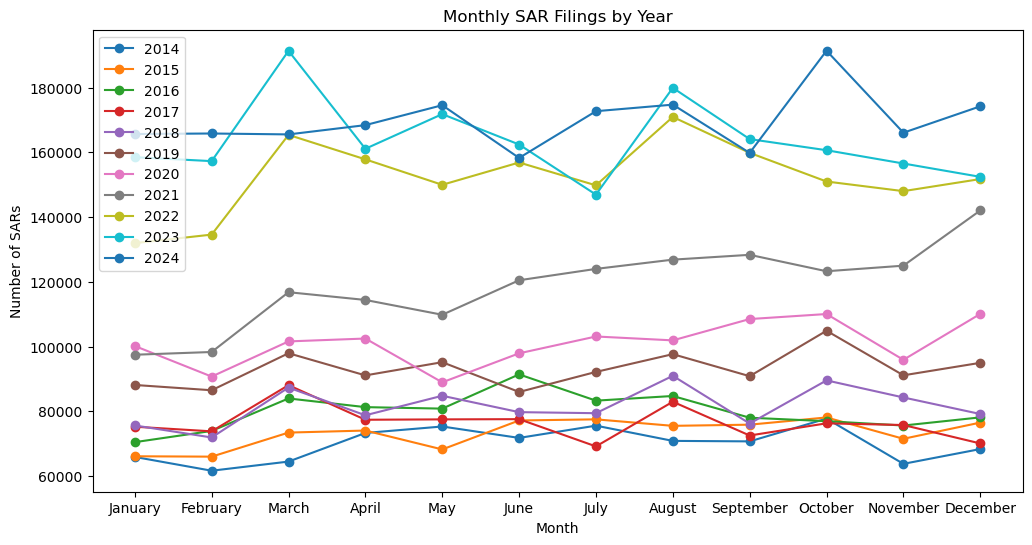

In [23]:
# Monthly SAR trend
monthly_sar = clean_year1_df.copy()
monthly_sar_long = monthly_sar.melt(id_vars=['Month'], var_name='Year', value_name='SARs')
monthly_sar_long = monthly_sar_long.dropna(subset=['SARs'])
monthly_sar_long['Year'] = monthly_sar_long['Year'].astype(int)

plt.figure(figsize=(12,6))
for year, group in monthly_sar_long.groupby('Year'):
    plt.plot(group['Month'], group['SARs'], marker='o', label=year)
plt.legend()
plt.title('Monthly SAR Filings by Year')
plt.ylabel('Number of SARs')
plt.xlabel('Month')
plt.show()

## 2. Which payment methods/instruments show the highest growth in suspicious activity?

In [33]:
# Payment method analysis
payment_df = clean_year9_df.copy()
# Filtering out rows with missing payment method info
#payment_df = payment_df.dropna(subset=['Suspicious Activity Type'], how='all')
# Summarizing by year and payment method
payment_long = payment_df.melt(
    id_vars=['Type of Instrument Type(s)/\nPayment Mechanism(s)'], # \n line break due to column structure
    value_vars=[str(y) for y in range(2014, 2025)],
    var_name='Year', value_name='Instrument'
)
#payment_long = payment_long.dropna(subset=['Instrument'])
#payment_long['Instruments'] = pd.to_numeric(payment_long['SARs'], errors='coerce')
top_methods = payment_long.groupby('Type of Instrument Type(s)/\nPayment Mechanism(s)')['Instrument'].sum().sort_values(ascending=False).head(5)
print(top_methods)

Type of Instrument Type(s)/\nPayment Mechanism(s)
U.S. Currency              6457466
Funds transfer             4210344
Personal/Business check    3589558
Other                      1066014
Bank/Cashier's check        859623
Name: Instrument, dtype: int64


In [32]:
print(payment_df.columns.tolist())

['Type of Instrument Type(s)/\nPayment Mechanism(s)', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


## 3. What correlations exist between payment methods/instruments and deposit account SARs?

In [35]:
# Correlation between payment methods/instruments and SARs
corr_df = payment_long.pivot_table(index='Year', columns='Type of Instrument Type(s)/\nPayment Mechanism(s)', values='Instrument', aggfunc='sum')
corr_matrix = corr_df.corr() # Calculating the correlation matrix between all payment methods/instruments across years
print(corr_matrix)

Type of Instrument Type(s)/
Payment Mechanism(s)   Bank/Cashier's check  \
Type of Instrument Type(s)/\nPayment Mechanism(s)                         
Bank/Cashier's check                                           1.000000   
Foreign currency                                               0.876274   
Funds transfer                                                 0.974927   
Gaming instruments                                             0.896989   
Government payment                                             0.536176   
Money orders                                                   0.630400   
Other                                                          0.458536   
Personal/Business check                                        0.976444   
Travelers checks                                              -0.806747   
U.S. Currency                                                  0.953894   

Type of Instrument Type(s)/
Payment Mechanism(s)   Foreign currency  \
Type of Instrument Type(s)/\

## Results: 
High positive values (close to 1) mean two payment methods/instruments tend to rise and fall together.
Negative values (close to -1) mean they move in opposite directions.
Values near 0 mean little or no correlation.

## 4a. What are the top 5 states with the highest number of SARs?

In [13]:
# Assessing state-level SARs
state_df = clean_year2_df.copy()
state_totals = state_df.groupby('State/Territory')['Total'].sum().sort_values(ascending=False).head(5)
print(state_totals)

State/Territory
California        2291535
Ohio              1445487
New York          1423928
North Carolina    1252861
Texas             1196373
Name: Total, dtype: int64


## 4b. What are the top 5 counties with the highest number of SARs?

In [14]:
# Assessing county-level SARs, reading in the original clean state_df 
state_df = pd.read_csv(
    r"C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\state_combined_data\state_combined.csv",
    dtype={
        'State': str,
        'County': str,        
    },
    thousands=','
)
county_totals = state_df.groupby('County')['Count'].sum().sort_values(ascending=False).head(5)
print(county_totals)

County
[Total]                     311966
Sussex County, DE           203105
San Francisco County, CA     46475
New Castle County, DE        40030
Los Angeles County, CA       18220
Name: Count, dtype: int64


C:\Users\Jen_L\AppData\Local\Temp\ipykernel_26776\1567142158.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  state_df = pd.read_csv(


## Note concerning Total: "Total," it indicates that the dollar value being reported is the accumulated suspicious amount from:
• Multiple, smaller transactions of different types or of a certain instrument type that, when combined, reach the threshold or pattern of suspicion.
• The overall amount associated with a suspicious scheme or pattern, rather than a single, distinct financial instrument like a "wire transfer" or a "money order."
This categorization is used when a single, specific financial instrument isn't the sole focus, but rather the cumulative financial impact of the suspicious activity is the key figure being reported.


## 5. What are the most common types of suspicious activity reported?

In [51]:
# Selecting the year columns
year_cols = [str(y) for y in range(2014, 2025)]

# Converting the year columns to numeric, coercing errors to NaN
for col in year_cols:
    activity_df[col] = pd.to_numeric(activity_df[col], errors='coerce')

# Grouping by suspicious activity type and suming across years
activity_totals = activity_df.groupby('Suspicious Activity Type')[year_cols].sum()

# Suming across all years for each type
activity_totals['Total'] = activity_totals.sum(axis=1)

# Filtering by the top 5 most common types
top_activities = activity_totals['Total'].sort_values(ascending=False).head(5)
print(top_activities)

Suspicious Activity Type
ACH                                                                     1224414.0
Account takeover                                                         479161.0
Exchanges small bills for large bills or vice versa                       62190.0
Alters or cancels transaction to avoid BSA recordkeeping requirement      43959.0
Application fraud*                                                        35624.0
Name: Total, dtype: float64


## 6. Find the top 10 SARs with the highest dollar amount reported.

In [60]:
# Converting the year columns to numeric
for col in cols_year:
    clean_year5_df[col] = pd.to_numeric(clean_year5_df[col], errors='coerce')

# Calculating the total across all years and find top 10
clean_year5_df['Total'] = clean_year5_df[list(cols_year)].sum(axis=1)
top_sars = clean_year5_df.nlargest(10, 'Total')[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Suspicious Activity Type', 'Suspicious Activity Category', 'Total']]
print(top_sars)

       2014     2015     2016     2017   2018   2019    2020    2021    2022  \
1   24904.0  37338.0  48679.0  50680.0  65179  88858  143269  176911  183730   
7   16668.0  23049.0  27132.0  27869.0  38315  42825   37917   43917   61104   
5    5965.0   4755.0   4810.0   4792.0   4847   6186    7720    7692    5502   
9    8199.0   5137.0   4236.0   4086.0   3931   3851    2989    3195    2724   
6       NaN      NaN      NaN      NaN    361   4394    4877    4579    6419   
0       NaN      NaN      NaN      NaN    260   2829    4871    5399    7188   
3    1304.0   1103.0    924.0    884.0   1002    893     682     728     752   
10    231.0    433.0    374.0    379.0    291    286     222     172     188   
8      36.0     64.0     84.0     66.0     70     86     151     310     347   
4      25.0     23.0     19.0     21.0     25     25      32      29      26   

      2023    2024                           Suspicious Activity Type  \
1   199939  204927                            

## 7. Identify any anomalous periods, and the activity types most impacted.

In [17]:
# Assessing for spikes and patterns/trends in monthly SARs data
monthly_sar['Total'] = monthly_sar[[str(y) for y in range(2014, 2025)]].sum(axis=1)
anomalies = monthly_sar[monthly_sar['Total'] > monthly_sar['Total'].mean() + 2*monthly_sar['Total'].std()]
print(anomalies[['Month', 'Total']])

Empty DataFrame
Columns: [Month, Total]
Index: []


In [18]:
print("Mean:", monthly_sar['Total'].mean())
print("Std:", monthly_sar['Total'].std())
print("Threshold:", monthly_sar['Total'].mean() + 2*monthly_sar['Total'].std())
print("Max value:", monthly_sar['Total'].max())

Mean: 1179534.9166666667
Std: 52918.289154057355
Threshold: 1285371.4949747815
Max value: 1256992.0


In [19]:
anomalies = monthly_sar[monthly_sar['Total'] > monthly_sar['Total'].mean() + monthly_sar['Total'].std()]
print(anomalies[['Month', 'Total']])

     Month      Total
2    March  1235838.0
7   August  1256992.0
9  October  1239840.0


In [20]:
# March, August, and October, the total SARs exceeded the threshold. These months have totals significantly higher than the average, which is why they are flagged as anomalies. The spikes could have been contributed to seasonal effects, specific events, or reporting cycles.

## 8. How did the pandemic (2020-2022) affect different types of financial crimes?

In [21]:
# Comparing suspicious activity from 2020-2022
pandemic_years = ['2020', '2021', '2022']
pandemic_df = activity_df[['Suspicious Activity Type'] + pandemic_years].groupby('Suspicious Activity Type').sum()
pandemic_df['Total'] = pandemic_df.sum(axis=1)
print(pandemic_df.sort_values('Total', ascending=False).head(10))

                                                      2020    2021    2022  \
Suspicious Activity Type                                                     
ACH                                                 143269  176911  183730   
Account takeover                                     37917   43917   61104   
Exchanges small bills for large bills or vice v...    7720    7692    5502   
Against financial institution(s)*                     4871    5399    7188   
Application fraud*                                    4877    4579    6419   
Alters or cancels transaction to avoid BSA reco...    2989    3195    2724   
Changes spelling or arrangement of name                682     728     752   
Insider trading                                        151     310     347   
Known or suspected terrorist/terrorist organiza...     222     172     188   
Excessive insurance                                     32      29      26   

                                                     Total  
Su

In [61]:
"""
Geodata Preparation Script for Bank Fraud SAR Analysis
Downloads and prepares US states and counties shapefiles for geospatial visualization
"""
import requests
import zipfile
import io

# Setting up paths
base_dir = Path(r"C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data")
geodata_dir = base_dir / "geodata"
geodata_dir .mkdir(exist_ok=True)

def download_census_data():
    """Download US Census TIGER/Line shapefiles"""
    print("Downloading US states shapefile...")
    
    # US States shapefile (2023 - latest available)
    states_url = "https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_state_500k.zip"
    
    # US Counties shapefile (2023)
    counties_url = "https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_county_500k.zip"
    
    # Download and extract states
    print("  Downloading states...")
    response = requests.get(states_url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall(geodata_dir / "states")
    print("  ✓ States downloaded")
    
    # Download and extract counties
    print("  Downloading counties...")
    response = requests.get(counties_url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall(geodata_dir / "counties")
    print("  ✓ Counties downloaded")

def prepare_state_geodata():
    """Load and prepare state geodata with SAR data"""
    print("\nPreparing state geodata...")
    
    # Load state shapefile
    states_gdf = gpd.read_file(geodata_dir / "states" / "cb_2023_us_state_500k.shp")
    
    # Load SAR state data
    clean_year2_df = pd.read_csv(r"C:\Users\Jen_L\year2_df.csv")
    
    # Aggregate by state
    state_totals = clean_year2_df.groupby('State/Territory')['Total'].sum().reset_index()
    state_totals.columns = ['NAME', 'SAR_Total']
    
    # Merge with geodata
    states_merged = states_gdf.merge(state_totals, on='NAME', how='left')
    states_merged['SAR_Total'] = states_merged['SAR_Total'].fillna(0)
    
    # Filter to continental US + Alaska + Hawaii (exclude territories for cleaner map)
    states_merged = states_merged[states_merged['STUSPS'].isin([
        'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
        'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
        'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
        'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
    ])]
    
    # Saving prepared geodata
    output_path = geodata_dir / "states_with_sar.geojson"
    states_merged.to_file(output_path, driver='GeoJSON')
    print(f"  ✓ State geodata saved to {output_path}")
    
    return states_merged

def prepare_county_geodata():
    """Load and prepare county geodata with SAR data"""
    print("\nPreparing county geodata...")
    
    # Loading county shapefile
    counties_gdf = gpd.read_file(geodata_dir / "counties" / "cb_2023_us_county_500k.shp")
    
    # Loading SAR county data
    state_df = pd.read_csv(
        r"C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\state_combined_data\state_combined.csv",
        dtype={'State': str, 'County': str},
        thousands=','
    )
    
    # Aggregating by county (excluding [Total])
    county_totals = state_df[state_df['County'] != '[Total]'].groupby('County')['Count'].sum().reset_index()
    county_totals.columns = ['County_Name', 'SAR_Count']
    
    # Creating a full county name for matching (e.g., "Los Angeles County, CA")
    counties_gdf['County_Full'] = counties_gdf['NAME'] + ' County, ' + counties_gdf['STUSPS']
    
    # Merging with geodata
    counties_merged = counties_gdf.merge(
        county_totals, 
        left_on='County_Full', 
        right_on='County_Name', 
        how='left'
    )
    counties_merged['SAR_Count'] = counties_merged['SAR_Count'].fillna(0)
    
    # Filtering to continental US + Alaska + Hawaii
    counties_merged = counties_merged[counties_merged['STUSPS'].isin([
        'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
        'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
        'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
        'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
    ])]
    
    # Saving prepared geodata
    output_path = geodata_dir / "counties_with_sar.geojson"
    counties_merged.to_file(output_path, driver='GeoJSON')
    print(f"  ✓ County geodata saved to {output_path}")
    
    return counties_merged

def main():
    """Main execution function"""
    print("=" * 60)
    print("Bank Fraud SAR Geodata Preparation")
    print("=" * 60)
    
    # Downloading census data
    if not (geodata_dir / "states").exists():
        download_census_data()
    else:
        print("Geodata files already exist. Skipping download...")
    
    # Preparing state geodata
    states_gdf = prepare_state_geodata()
    print(f"  States with SAR data: {len(states_gdf)}")
    print(f"  Top 5 states by SAR total:")
    print(states_gdf.nlargest(5, 'SAR_Total')[['NAME', 'SAR_Total']])
    
    # Preparing county geodata
    counties_gdf = prepare_county_geodata()
    print(f"\n  Counties with SAR data: {len(counties_gdf[counties_gdf['SAR_Count'] > 0])}")
    print(f"  Top 5 counties by SAR count:")
    print(counties_gdf.nlargest(5, 'SAR_Count')[['NAME', 'STUSPS', 'SAR_Count']])
    
    print("\n" + "=" * 60)
    print("✓ Geodata preparation complete!")
    print("=" * 60)

if __name__ == "__main__":
    main()


Bank Fraud SAR Geodata Preparation
  ✓ States downloaded
  ✓ Counties downloaded

Preparing state geodata...
  ✓ State geodata saved to C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\geodata\states_with_sar.geojson
  States with SAR data: 50
  Top 5 states by SAR total:
              NAME  SAR_Total
2       California  2291535.0
48            Ohio  1445487.0
14        New York  1423928.0
52  North Carolina  1252861.0
47           Texas  1196373.0

Preparing county geodata...


C:\Users\Jen_L\AppData\Local\Temp\ipykernel_26776\1024317040.py:80: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  state_df = pd.read_csv(


  ✓ County geodata saved to C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\geodata\counties_with_sar.geojson

  Counties with SAR data: 2099
  Top 5 counties by SAR count:
               NAME STUSPS  SAR_Count
303          Sussex     DE   203105.0
3014  San Francisco     CA    46475.0
302      New Castle     DE    40030.0
7       Los Angeles     CA    18220.0
1192          Clark     NV    17195.0

✓ Geodata preparation complete!


In [73]:
"""
Visualization Code for Bank Fraud SAR Analysis
Creates charts for PowerPoint (Q3, Q7) and geospatial maps (Q4a, Q4b)
CORRECTED VERSION: Heat scales now properly reflect callout box data
"""

# Setting up paths
base_dir = path(r"C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data")
output_dir = base_dir / "visualizations"
output_dir.mkdir(exist_ok=True)

# Setting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def create_correlation_heatmap():
    """
    Q3: Create correlation heatmap for payment methods/instruments
    Output: High-resolution PNG for PowerPoint
    """
    print("Creating Q3: Correlation Heatmap...")
    
    # Loading data
    clean_year9_df = pd.read_csv(r"C:\Users\Jen_L\year9_df.csv")
    
    # Reshaping data
    payment_long = clean_year9_df.melt(
        id_vars=['Type of Instrument Type(s)/\nPayment Mechanism(s)'],
        var_name='Year',
        value_name='Instrument'
    )
    
    # Creating pivot table
    corr_df = payment_long.pivot_table(
        index='Year',
        columns='Type of Instrument Type(s)/\nPayment Mechanism(s)',
        values='Instrument',
        aggfunc='sum'
    )
    
    # Calculating correlation matrix
    corr_matrix = corr_df.corr()
    
    # Creating figure
    fig, ax = plt.subplots(figsize=(14, 12))
    
    # Creating heatmap with annotations
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap='RdYlGn',
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
        ax=ax
    )
    
    plt.title('Correlation Between Payment Methods/Instruments in SARs\n(2014-2024)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Save high-resolution PNG
    output_path = OUTPUT_DIR / "Q3_Correlation_Heatmap.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"  ✓ Saved to {output_path}")
    plt.close()
    
    return corr_matrix

def create_anomalous_periods_chart():
    """
    Q7: Create line chart showing anomalous periods
    Output: High-resolution PNG for PowerPoint
    """
    print("\nCreating Q7: Anomalous Periods Chart...")
    
    # Loading data
    clean_year1_df = pd.read_csv(r"C:\Users\Jen_L\year1_df.csv")
    
    # Calculating monthly totals
    year_cols = [str(y) for y in range(2014, 2025)]
    for col in year_cols:
        clean_year1_df[col] = pd.to_numeric(clean_year1_df[col], errors='coerce')
    
    clean_year1_df['Total'] = clean_year1_df[year_cols].sum(axis=1)
    
    # Calculating statistics
    mean_total = clean_year1_df['Total'].mean()
    std_total = clean_year1_df['Total'].std()
    threshold = mean_total + std_total
    
    # anomalies
    anomalies = clean_year1_df[clean_year1_df['Total'] > threshold]
    
    # Creating figure
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plotting line
    ax.plot(clean_year1_df['Month'], clean_year1_df['Total'], 
            marker='o', linewidth=2.5, markersize=8, label='Total SARs', color='#2E86AB')
    
    # Adding mean line
    ax.axhline(y=mean_total, color='green', linestyle='--', linewidth=2, 
               label=f'Mean ({mean_total:,.0f})', alpha=0.7)
    
    # Adding threshold line
    ax.axhline(y=threshold, color='orange', linestyle='--', linewidth=2, 
               label=f'Threshold (Mean + 1 SD: {threshold:,.0f})', alpha=0.7)
    
    # Highlighting anomalies
    if not anomalies.empty:
        ax.scatter(anomalies['Month'], anomalies['Total'], 
                  color='red', s=300, marker='*', zorder=5, 
                  label='Anomalous Months', edgecolors='darkred', linewidth=2)
        
        # Annotating anomalies
        for idx, row in anomalies.iterrows():
            ax.annotate(f"{row['Month']}\n{row['Total']:,.0f}", 
                       xy=(row['Month'], row['Total']),
                       xytext=(10, 15), textcoords='offset points',
                       bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                       arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red'),
                       fontsize=9, fontweight='bold')
    
    # Formatting
    ax.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax.set_ylabel('Total SARs Filed', fontsize=12, fontweight='bold')
    ax.set_title('Anomalous Periods in SAR Filings (2014-2024)\nMonthly Aggregates Across All Years', 
                fontsize=16, fontweight='bold', pad=20)
    ax.legend(loc='upper left', fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    
    # Formatting y-axis with commas
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.tight_layout()
    
    # Save high-resolution PNG
    output_path = OUTPUT_DIR / "Q7_Anomalous_Periods.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"  ✓ Saved to {output_path}")
    plt.close()
    
    print(f"  Anomalous months detected: {', '.join(anomalies['Month'].tolist())}")

def create_state_choropleth():
    """
    Q4a: Create state-level choropleth map
    Output: High-resolution PNG for PowerPoint
    CORRECTED: Color scale now matches callout box data
    """
    print("\nCreating Q4a: State-Level Choropleth Map...")
    
    # Loading geodata
    geodata_path = BASE_DIR / "geodata" / "states_with_sar.geojson"
    if not geodata_path.exists():
        print("  ⚠ Geodata not found. Run geodata_preparation.py first.")
        return
    
    states_gdf = gpd.read_file(geodata_path)
    
    # Set color scale range to match top 5 data (1M to 2.3M approximately)
    vmin = 1_000_000
    vmax = 2_300_000
    
    print(f"  Color scale range: {vmin:,.0f} to {vmax:,.0f}")
    
    # Creating figure
    fig, ax = plt.subplots(figsize=(20, 12))
    
    # Plotting choropleth with explicit vmin/vmax to match callout data
    states_gdf.plot(
        column='SAR_Total',
        cmap='YlOrRd',
        linewidth=0.5,
        edgecolor='black',
        legend=True,
        vmin=vmin,
        vmax=vmax,
        legend_kwds={
            'label': "Total SAR Filings",
            'orientation': "horizontal",
            'shrink': 0.5,
            'pad': 0.05,
            'format': '{x:,.0f}'
        },
        ax=ax,
        missing_kwds={'color': 'lightgrey'}
    )
    
    # Get top 5 states for both callout and labels
    top_states = states_gdf.nlargest(5, 'SAR_Total').reset_index(drop=True)
    
    # Adding labels for top 5 states with offsets
    label_offsets = [
        (-8, 3),       # Rank 1 (California): West
        (5, 3),        # Rank 2 (Ohio): Northeast
        (8, -2),       # Rank 3 (New York): East
        (7, 0),        # Rank 4 (North Carolina): East
        (-5, -5)       # Rank 5 (Texas): Southwest
    ]
    
    for rank, (idx, row) in enumerate(top_states.iterrows()):
        centroid = row.geometry.centroid
        offset_x, offset_y = label_offsets[rank]
        
        # Calculating label position with offset
        label_x = centroid.x + offset_x
        label_y = centroid.y + offset_y
        
        # Adding annotation with arrow
        ax.annotate(
            f"#{rank+1}: {row['NAME']}\n{row['SAR_Total']:,.0f} SARs",
            xy=(centroid.x, centroid.y),
            xytext=(label_x, label_y),
            ha='center',
            fontsize=10,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.6', facecolor='white', alpha=0.98, edgecolor='darkblue', linewidth=2),
            arrowprops=dict(
                arrowstyle='-|>',
                connectionstyle='arc3,rad=0.3',
                color='darkblue',
                lw=2.5
            ),
            zorder=10
        )
    
    # Building the text for the call-out box
    callout_text = "TOP 5 STATES BY SAR FILINGS\n" + "="*35 + "\n"
    for rank, (idx, row) in enumerate(top_states.iterrows(), 1):
        callout_text += f"{rank}. {row['NAME']:20s} {int(row['SAR_Total']):>10,}\n"
    
    # Adding call-out box in the upper right corner
    ax.text(
        0.98, 0.98,
        callout_text,
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=1', facecolor='white', edgecolor='darkblue', linewidth=3, alpha=0.95),
        family='monospace',
        fontweight='bold'
    )
    
    ax.set_title('Top 5 States by SAR Filings (2014-2024)', 
                fontsize=18, fontweight='bold', pad=20)
    ax.axis('off')
    
    plt.tight_layout()
    
    # Save high-resolution PNG
    output_path = OUTPUT_DIR / "Q4a_State_Choropleth.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"  ✓ Saved to {output_path}")
    plt.close()

def create_county_choropleth():
    """
    Q4b: Create county-level choropleth map
    Output: High-resolution PNG for PowerPoint
    CORRECTED: Color scale now matches callout box data
    """
    print("\nCreating Q4b: County-Level Choropleth Map...")
    
    # Loading geodata
    geodata_path = BASE_DIR / "geodata" / "counties_with_sar.geojson"
    if not geodata_path.exists():
        print("  ⚠ Geodata not found. Run geodata_preparation.py first.")
        return
    
    counties_gdf = gpd.read_file(geodata_path)
    
    # Filtering to counties with SAR data
    counties_with_data = counties_gdf[counties_gdf['SAR_Count'] > 0]
    
    # Setting color scale range to match top 5 data (10K to 205K approximately)
    vmin = 10_000
    vmax = 205_000
    
    print(f"  Color scale range: {vmin:,.0f} to {vmax:,.0f}")
    
    # Creating figure
    fig, ax = plt.subplots(figsize=(20, 12))
    
    # Plotting base map (all counties in light gray)
    counties_gdf.plot(color='lightgrey', linewidth=0.1, edgecolor='white', ax=ax)
    
    # Plotting choropleth for counties with data - explicit vmin/vmax to match callout
    counties_with_data.plot(
        column='SAR_Count',
        cmap='YlOrRd',
        linewidth=0.3,
        edgecolor='black',
        legend=True,
        vmin=vmin,
        vmax=vmax,
        legend_kwds={
            'label': "Total SAR Filings",
            'orientation': "horizontal",
            'shrink': 0.5,
            'pad': 0.05,
            'format': '{x:,.0f}'
        },
        ax=ax
    )
    
    # Adding labels for top 5 counties with large offsets to prevent overlap
    top_counties = counties_with_data.nlargest(5, 'SAR_Count').reset_index(drop=True)
    
    # Defining offset positions in degrees (larger values to spread labels out)
    # Formatting: (x_offset, y_offset) where positive x is east, positive y is north
    label_offsets = [
        (3, 5),        # Rank 1 (Sussex, DE): North
        (8, 2),        # Rank 2 (New Castle, DE): Northeast
        (-18, 3),      # Rank 3 (San Francisco, CA): West
        (-18, -3),     # Rank 4 (Los Angeles, CA): Southwest
        (-12, 8)       # Rank 5: Northwest
    ]
    
    for rank, (idx, row) in enumerate(top_counties.iterrows()):
        centroid = row.geometry.centroid
        offset_x, offset_y = label_offsets[rank]
        
        # Calculating label position with offset
        label_x = centroid.x + offset_x
        label_y = centroid.y + offset_y
        
        # Adding annotation with arrow
        ax.annotate(
            f"#{rank+1}: {row['NAME']}, {row['STUSPS']}\n{row['SAR_Count']:,.0f} SARs",
            xy=(centroid.x, centroid.y),  # Point to county centroid
            xytext=(label_x, label_y),     # Label position with offset
            ha='center',
            fontsize=10,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.6', facecolor='white', alpha=0.98, edgecolor='darkred', linewidth=2),
            arrowprops=dict(
                arrowstyle='-|>',
                connectionstyle='arc3,rad=0.3',
                color='darkred',
                lw=2.5
            ),
            zorder=10
        )
    
    # Creating call-out box with top 5 counties data
    callout_text = "TOP 5 COUNTIES BY SAR FILINGS\n" + "="*40 + "\n"
    for rank, (idx, row) in enumerate(top_counties.iterrows(), 1):
        county_name = f"{row['NAME']}, {row['STUSPS']}"
        callout_text += f"{rank}. {county_name:25s} {int(row['SAR_Count']):>10,}\n"
    
    # Adding call-out box in the upper right corner
    ax.text(
        0.98, 0.98,
        callout_text,
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=1', facecolor='white', edgecolor='darkred', linewidth=3, alpha=0.95),
        family='monospace',
        fontweight='bold'
    )
    
    ax.set_title('Top 5 Counties by SAR Filings (2014-2024)', 
                fontsize=18, fontweight='bold', pad=20)
    ax.axis('off')
    
    plt.tight_layout()
    
    # Save high-resolution PNG
    output_path = OUTPUT_DIR / "Q4b_County_Choropleth.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"  ✓ Saved to {output_path}")
    plt.close()

def create_powerbi_exports():
    """
    Create cleaned CSV exports optimized for Power BI import
    """
    print("\nCreating Power BI export files...")
    
    powerbi_dir = BASE_DIR / "powerbi_exports"
    powerbi_dir.mkdir(exist_ok=True)
    
    # Q1: Monthly trends
    clean_year1_df = pd.read_csv(r"C:\Users\Jen_L\year1_df.csv")
    
    # Add month number for proper sorting in Power BI
    month_order = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    clean_year1_df['Month_Number'] = clean_year1_df['Month'].map(month_order)
    
    year_cols = [str(y) for y in range(2014, 2025)]
    monthly_long = clean_year1_df.melt(
        id_vars=['Month', 'Month_Number'],
        value_vars=year_cols,
        var_name='Year',
        value_name='SAR_Count'
    )
    
    # Sort by month number and year
    monthly_long = monthly_long.sort_values(['Year', 'Month_Number'])
    
    monthly_long.to_csv(powerbi_dir / "Q1_Monthly_Trends.csv", index=False)
    print(f"  ✓ Q1_Monthly_Trends.csv")
    
    # Q2: State rankings
    clean_year2_df = pd.read_csv(r"C:\Users\Jen_L\year2_df.csv")
    clean_year2_df.to_csv(powerbi_dir / "Q2_State_Rankings.csv", index=False)
    print(f"  ✓ Q2_State_Rankings.csv")
    
    # Q5: Suspicious activities
    clean_year5_df = pd.read_csv(r"C:\Users\Jen_L\year5_df.csv")
    clean_year5_df.to_csv(powerbi_dir / "Q5_Suspicious_Activities.csv", index=False)
    print(f"  ✓ Q5_Suspicious_Activities.csv")
    
    # Q6: Top SARs by dollar amount
    clean_year5_df = pd.read_csv(r"C:\Users\Jen_L\year5_df.csv")
    year_cols = [str(y) for y in range(2014, 2025)]
    for col in year_cols:
        clean_year5_df[col] = pd.to_numeric(clean_year5_df[col], errors='coerce')
    clean_year5_df['Total'] = clean_year5_df[year_cols].sum(axis=1)
    top_sars = clean_year5_df.nlargest(10, 'Total')
    top_sars.to_csv(powerbi_dir / "Q6_Top_SARs.csv", index=False)
    print(f"  ✓ Q6_Top_SARs.csv")
    
    # Q8: Pandemic impact
    clean_year5_df = pd.read_csv(r"C:\Users\Jen_L\year5_df.csv")
    pandemic_cols = ['Suspicious Activity Type', '2020', '2021', '2022']
    pandemic_df = clean_year5_df[pandemic_cols].copy()
    for col in ['2020', '2021', '2022']:
        pandemic_df[col] = pd.to_numeric(pandemic_df[col], errors='coerce')
    pandemic_long = pandemic_df.melt(
        id_vars=['Suspicious Activity Type'],
        var_name='Year',
        value_name='SAR_Count'
    )
    pandemic_long.to_csv(powerbi_dir / "Q8_Pandemic_Impact.csv", index=False)
    print(f"  ✓ Q8_Pandemic_Impact.csv")
    
    print(f"\n  All Power BI exports saved to {powerbi_dir}")

def main():
    """Main execution function"""
    print("=" * 60)
    print("Bank Fraud SAR Visualization Generation")
    print("Heat scales match callout boxes")
    print("=" * 60)
    
    # Create visualizations for PowerPoint
    create_correlation_heatmap()
    create_anomalous_periods_chart()
    
    # Create geospatial visualizations
    create_state_choropleth()
    create_county_choropleth()
    
    # Create Power BI exports
    create_powerbi_exports()
    
    print("\n" + "=" * 60)
    print("✓ All visualizations created successfully!")
    print(f"✓ Files saved to {OUTPUT_DIR}")
    print("=" * 60)   

if __name__ == "__main__":
    main()


Bank Fraud SAR Visualization Generation
CORRECTED VERSION - Heat scales match callout boxes
Creating Q3: Correlation Heatmap...
  ✓ Saved to C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\visualizations\Q3_Correlation_Heatmap.png

Creating Q7: Anomalous Periods Chart...
  ✓ Saved to C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\visualizations\Q7_Anomalous_Periods.png
  Anomalous months detected: March, August, October

Creating Q4a: State-Level Choropleth Map...
  Color scale range: 1,000,000 to 2,300,000
  ✓ Saved to C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\visualizations\Q4a_State_Choropleth.png

Creating Q4b: County-Level Choropleth Map...
  Color scale range: 10,000 to 205,000
  ✓ Saved to C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\visualizations\Q4b_County_Choropleth.png

Creating Power BI export files...
  ✓ Q1_Monthly_Trends.csv
 

In [84]:
# Making x/y labels more readable 

base_dir = Path(r"C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data")
output_dir = base_dir / "visualizations"
output_dir.mkdir(exist_ok=True)

# Setting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def create_correlation_heatmap():
    """
    Q3: Create correlation heatmap for payment methods/instruments
    Output: High-resolution PNG for PowerPoint
    """
    print("Creating Q3: Correlation Heatmap...")    
 
    clean_year9_df = pd.read_csv(r"C:\Users\Jen_L\year9_df.csv")    
    payment_long = clean_year9_df.melt(
        id_vars=['Type of Instrument Type(s)/\nPayment Mechanism(s)'],
        var_name='Year',
        value_name='Instrument'
    )
    
    # Creating pivot table
    corr_df = payment_long.pivot_table(
        index='Year',
        columns='Type of Instrument Type(s)/\nPayment Mechanism(s)',
        values='Instrument',
        aggfunc='sum'
    )
    
    # Creating figure
    fig, ax = plt.subplots(figsize=(14, 12))
    
    # Creating heatmap with annotations
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap='RdYlGn',
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},       
        annot_kws={"color": "black", "fontsize": 10}, 
        ax=ax
    )
    
    plt.title('Correlation Between Payment Methods/Instruments in SARs\n(2014-2024)', 
              fontsize=16, fontweight='bold', pad=20)      
  
    ax.set_xlabel("")
    ax.set_ylabel("")
    plt.xticks(rotation=45, ha='right', fontsize=12, color='black') # Increased fontsize and set color 
    
    plt.yticks(rotation=0, fontsize=12, color='black') # Increased fontsize and set color    

    ax.collections[0].colorbar.set_label("Correlation Coefficient", color='black', fontsize=12)     
   
    ax.collections[0].colorbar.ax.tick_params(labelsize=10, colors='black')

    plt.tight_layout()
    
    # Save high-resolution PNG
    output_path = OUTPUT_DIR / "Q3_Correlation_Heatmap_corrected.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"  ✓ Saved to {output_path}")
    plt.close()
    
    return corr_matrix

if __name__ == "__main__":
  
    print("=" * 60)
    print("Bank Fraud SAR Visualization Generation")   
    print("=" * 60)
    
    # Creating visualizations for PowerPoint
    create_correlation_heatmap()
    
    print("\n" + "=" * 60)
    print("✓ visualizations created successfully!")
    print(f"✓ Files saved to {OUTPUT_DIR}")
    print("=" * 60)


Bank Fraud SAR Visualization Generation
Creating Q3: Correlation Heatmap...
  ✓ Saved to C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\visualizations\Q3_Correlation_Heatmap_corrected.png

✓ visualizations created successfully!
✓ Files saved to C:\Users\Jen_L\OneDrive\Documents\NSS\DA15\capstone\Bank_Fraud_Capstone_2025\data\visualizations
